## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Tue Jan 16 03:07:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/225.8 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Import dataset from Roboflow

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ezHvcyEgei0zZc6ATXf7")
project = rf.workspace("fyp-with-dr-nora").project("caries-detection-sipfq")
dataset = project.version(8).download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Caries-detection-8 in yolov8:: 100%|██████████| 802/802 [00:00<00:00, 3572.83it/s]


## Image Preprocessing - Improve resolution

In [ ]:
# git clone repo for ESRGAN
!git clone https://github.com/xinntao/ESRGAN


Cloning into 'ESRGAN'...
remote: Enumerating objects: 225, done.
remote: Total 225 (delta 0), reused 0 (delta 0), pack-reused 225
Receiving objects: 100% (225/225), 24.86 MiB | 25.25 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [ ]:
# install dependencies
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install opencv-python glob2


Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
%cd /content/ESRGAN


[Errno 2] No such file or directory: '/content/ESRGAN'
/content/datasets


In [ ]:
# download model
# change file path source and destination
# change file extension
!python test.py


python3: can't open file '/content/datasets/test.py': [Errno 2] No such file or directory


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=250 imgsz=800 plots=True patience=100 batch=8

/content
100% 21.5M/21.5M [00:00<00:00, 113MB/s] 

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Caries-detection-8/data.yaml, epochs=250, patience=100, batch=8, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ke


###Display results - confusion matrix, graphs

In [ ]:
!ls {HOME}/runs/detect/train4/

ls: cannot access '/content/runs/detect/train4/': No such file or directory


/content


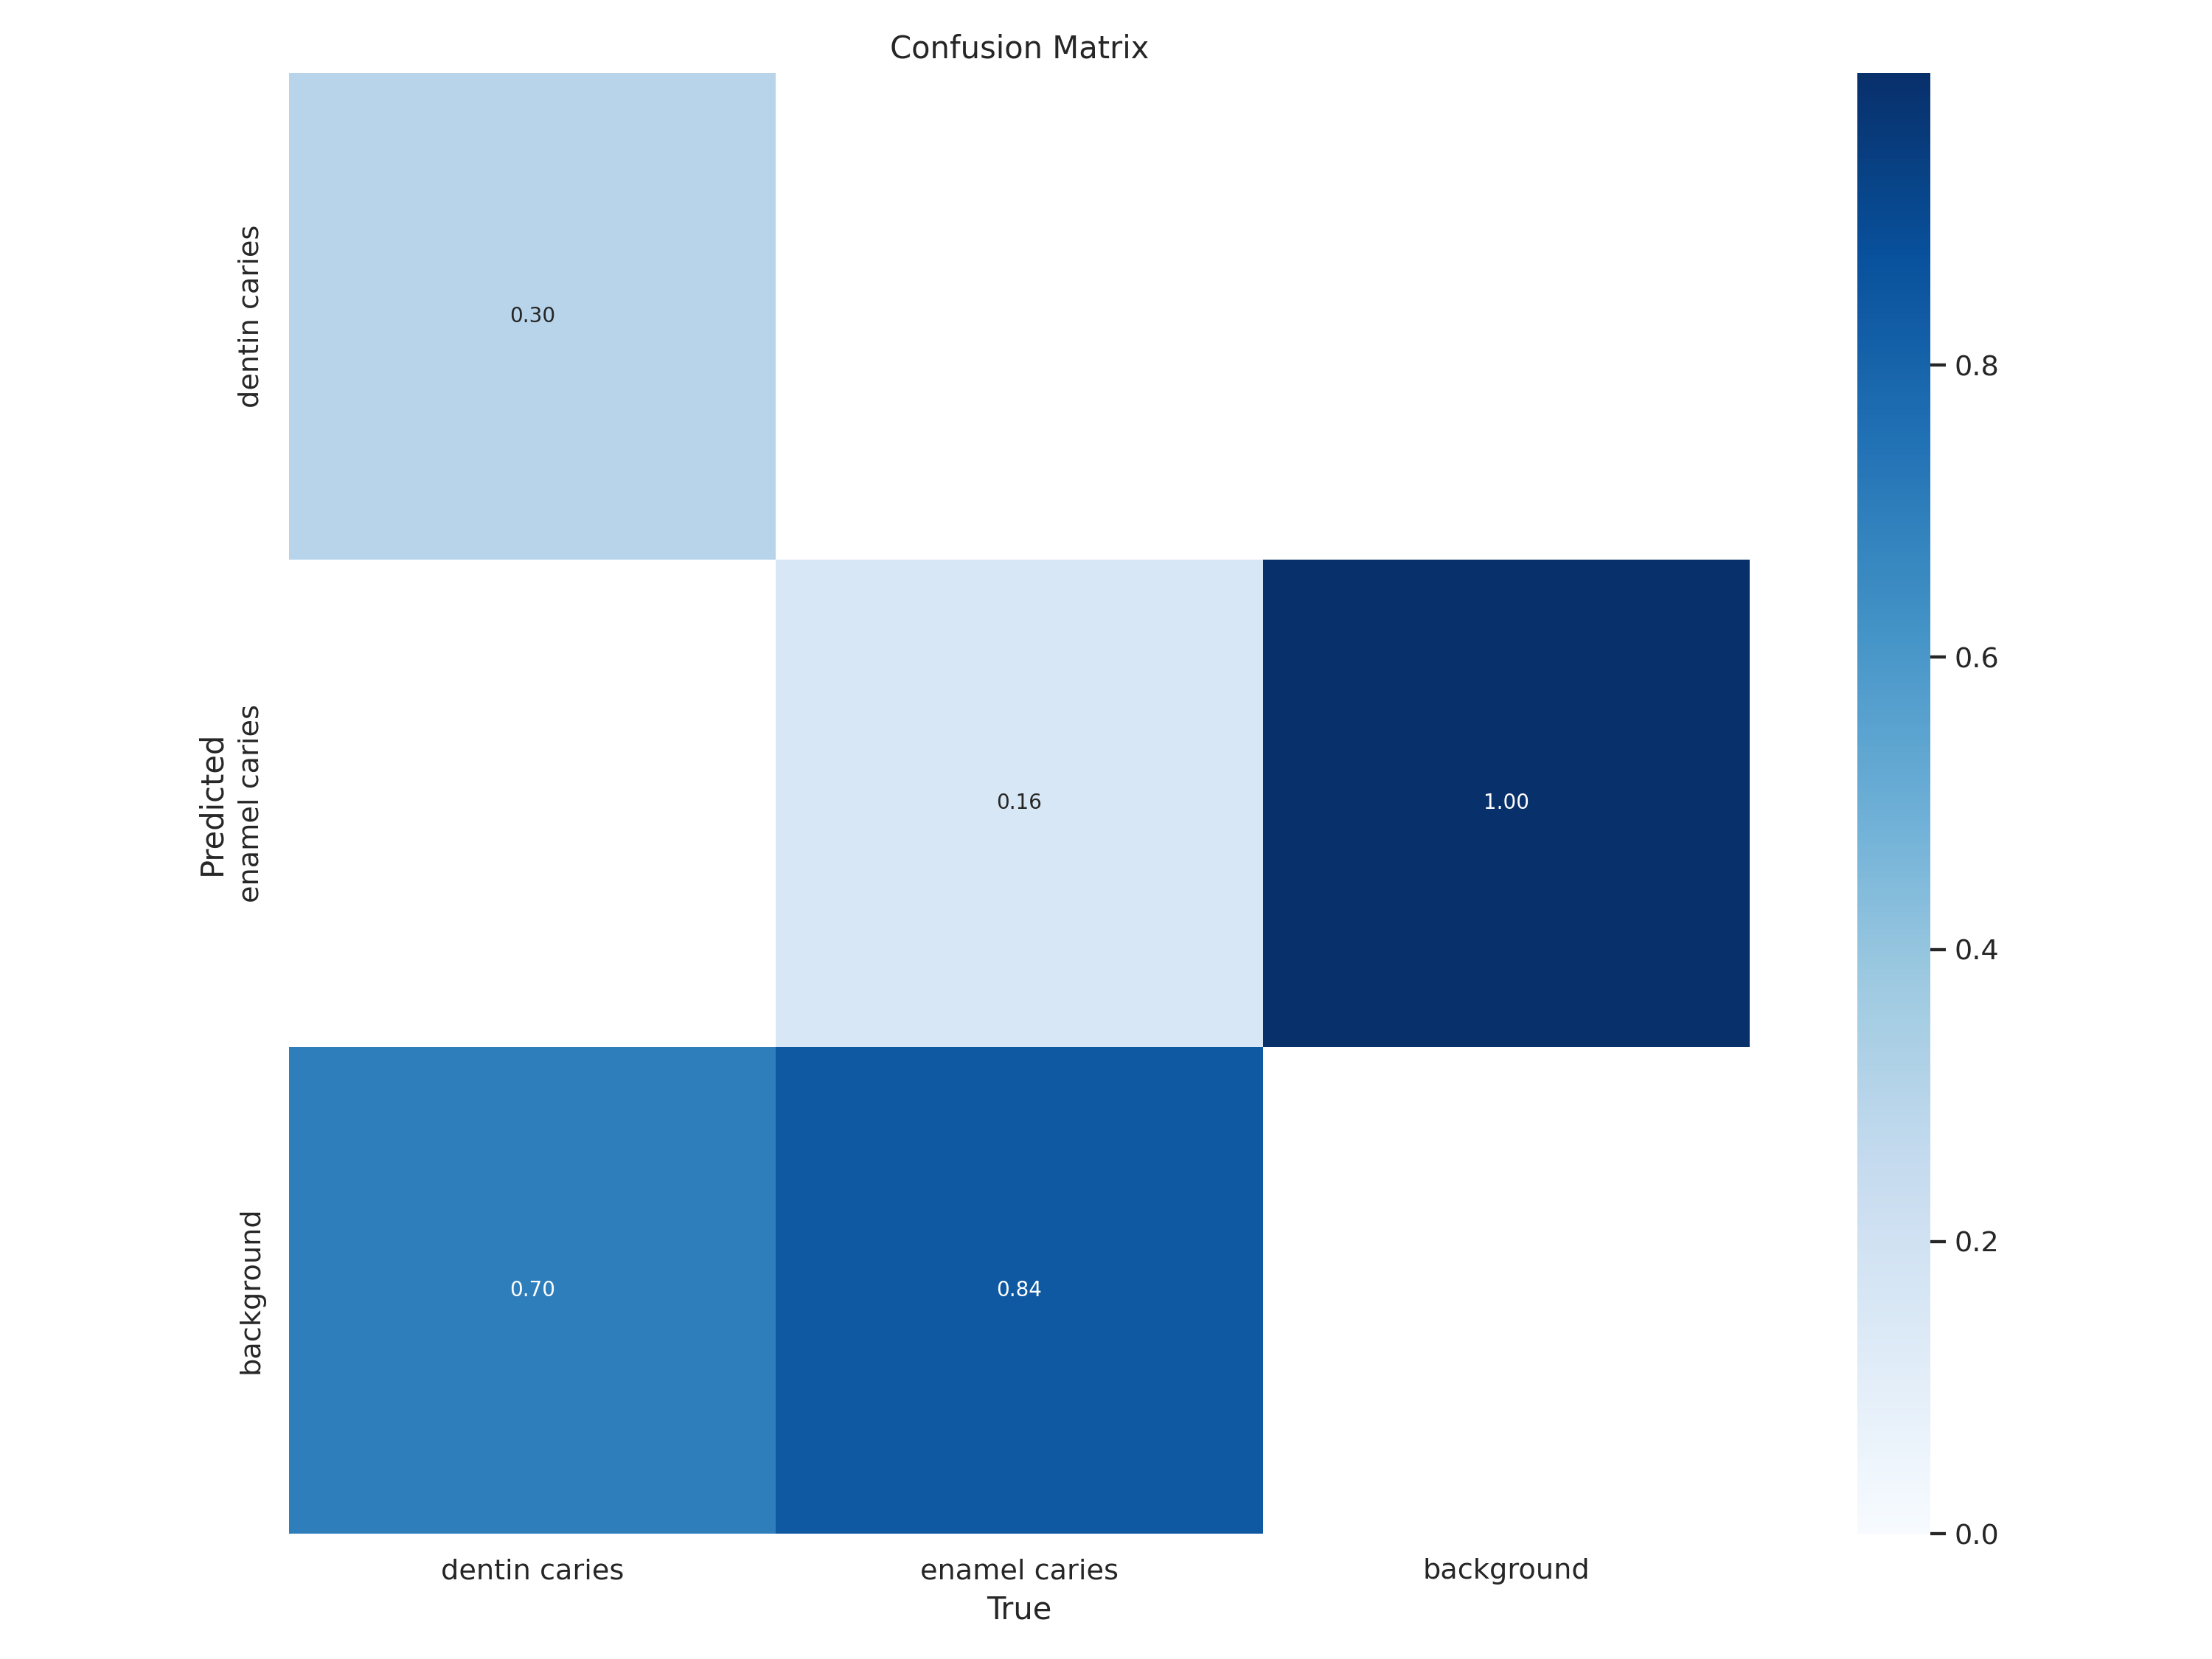

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


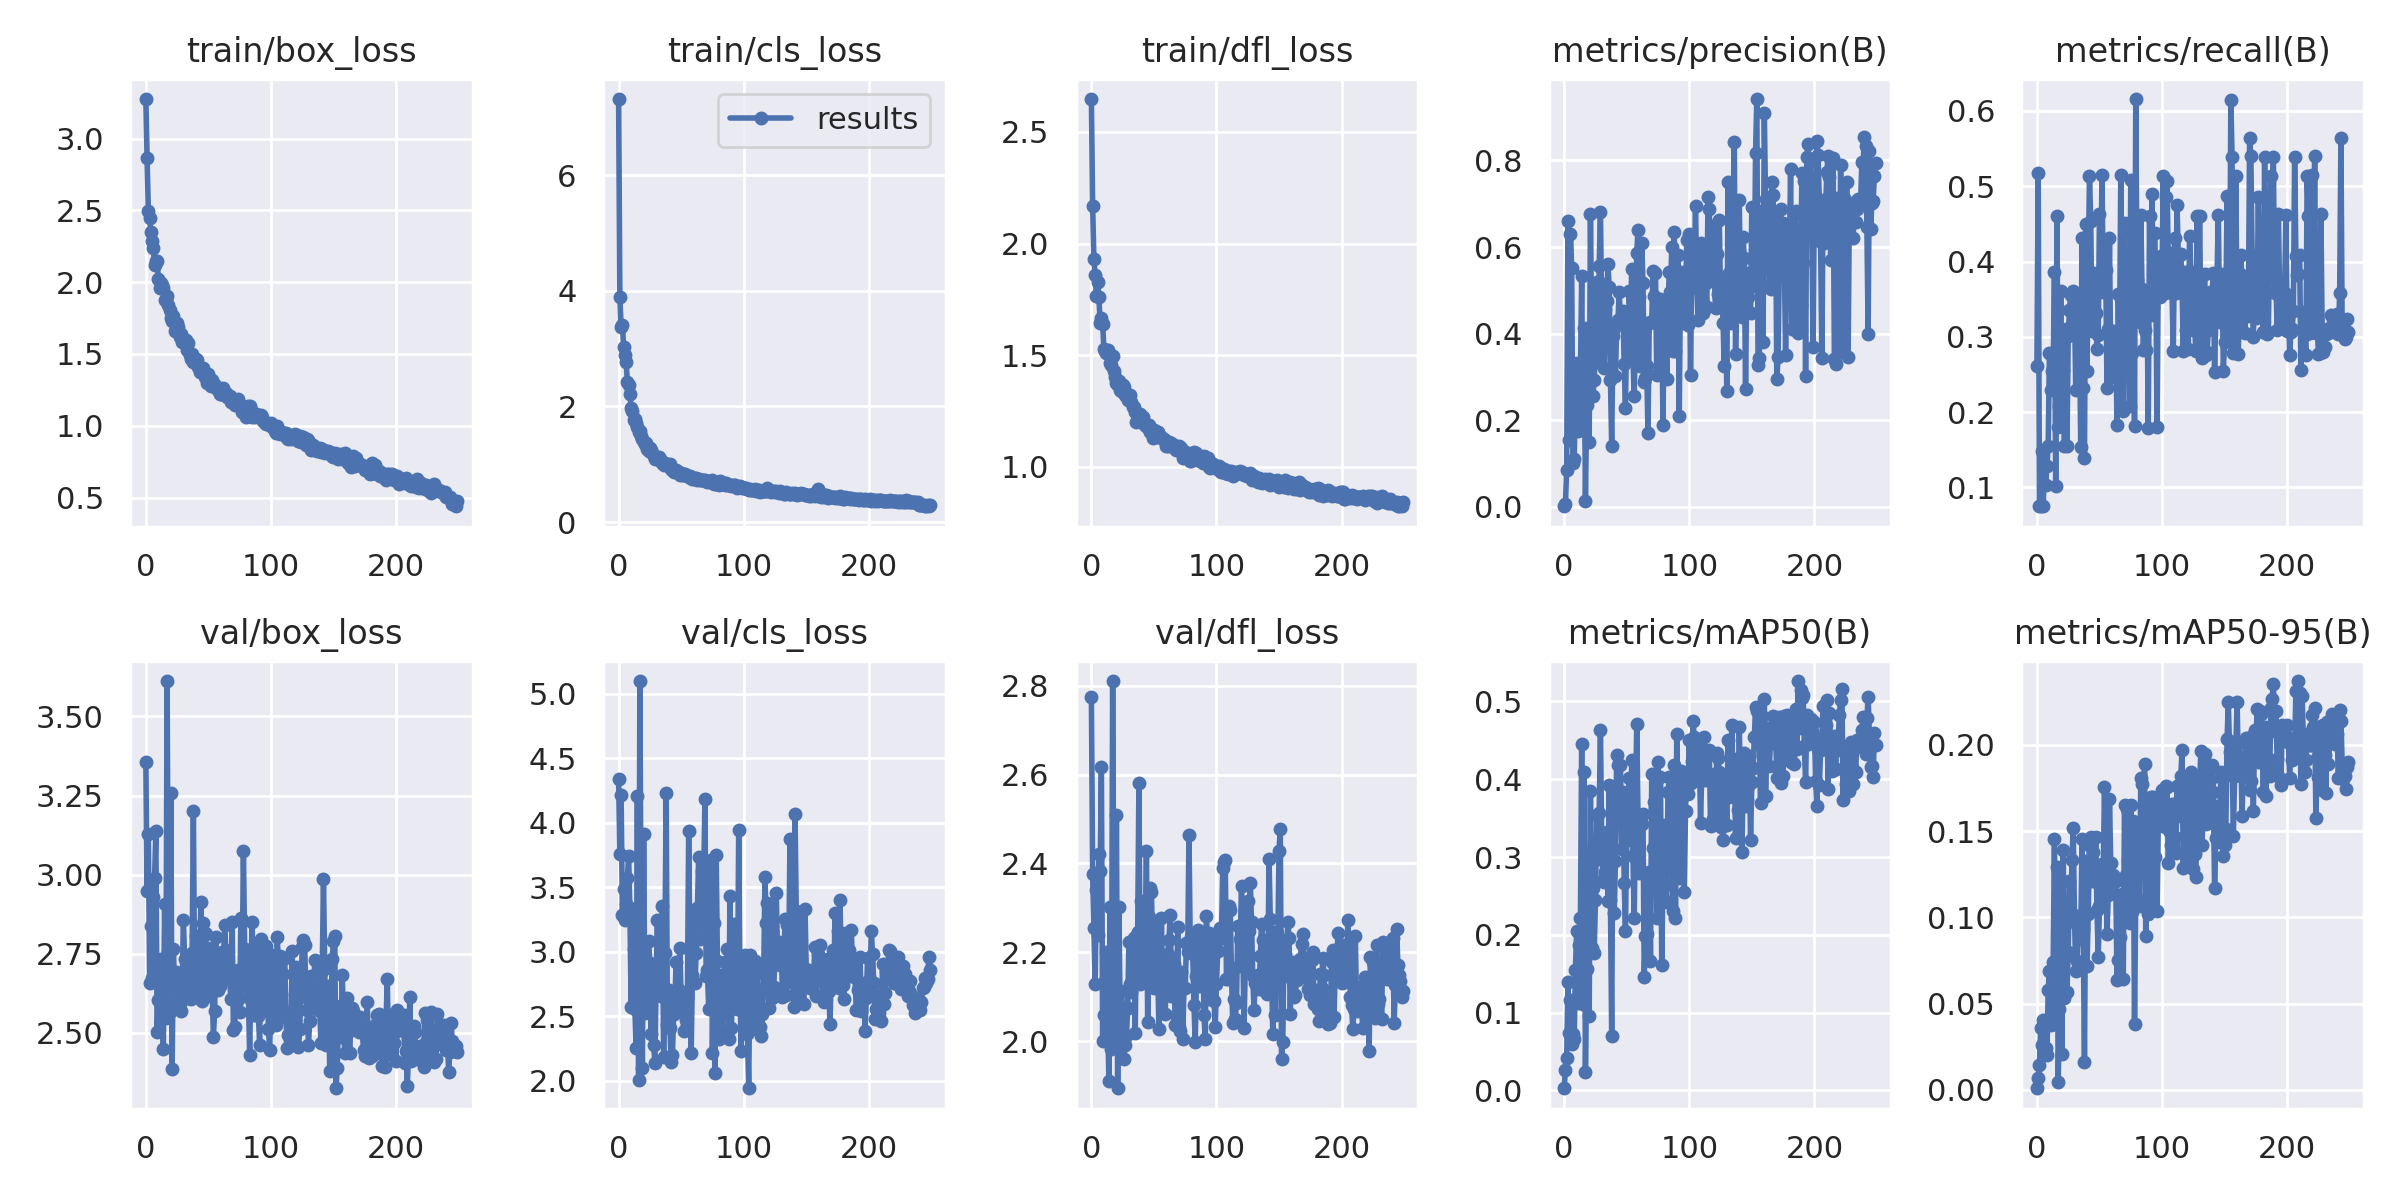

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


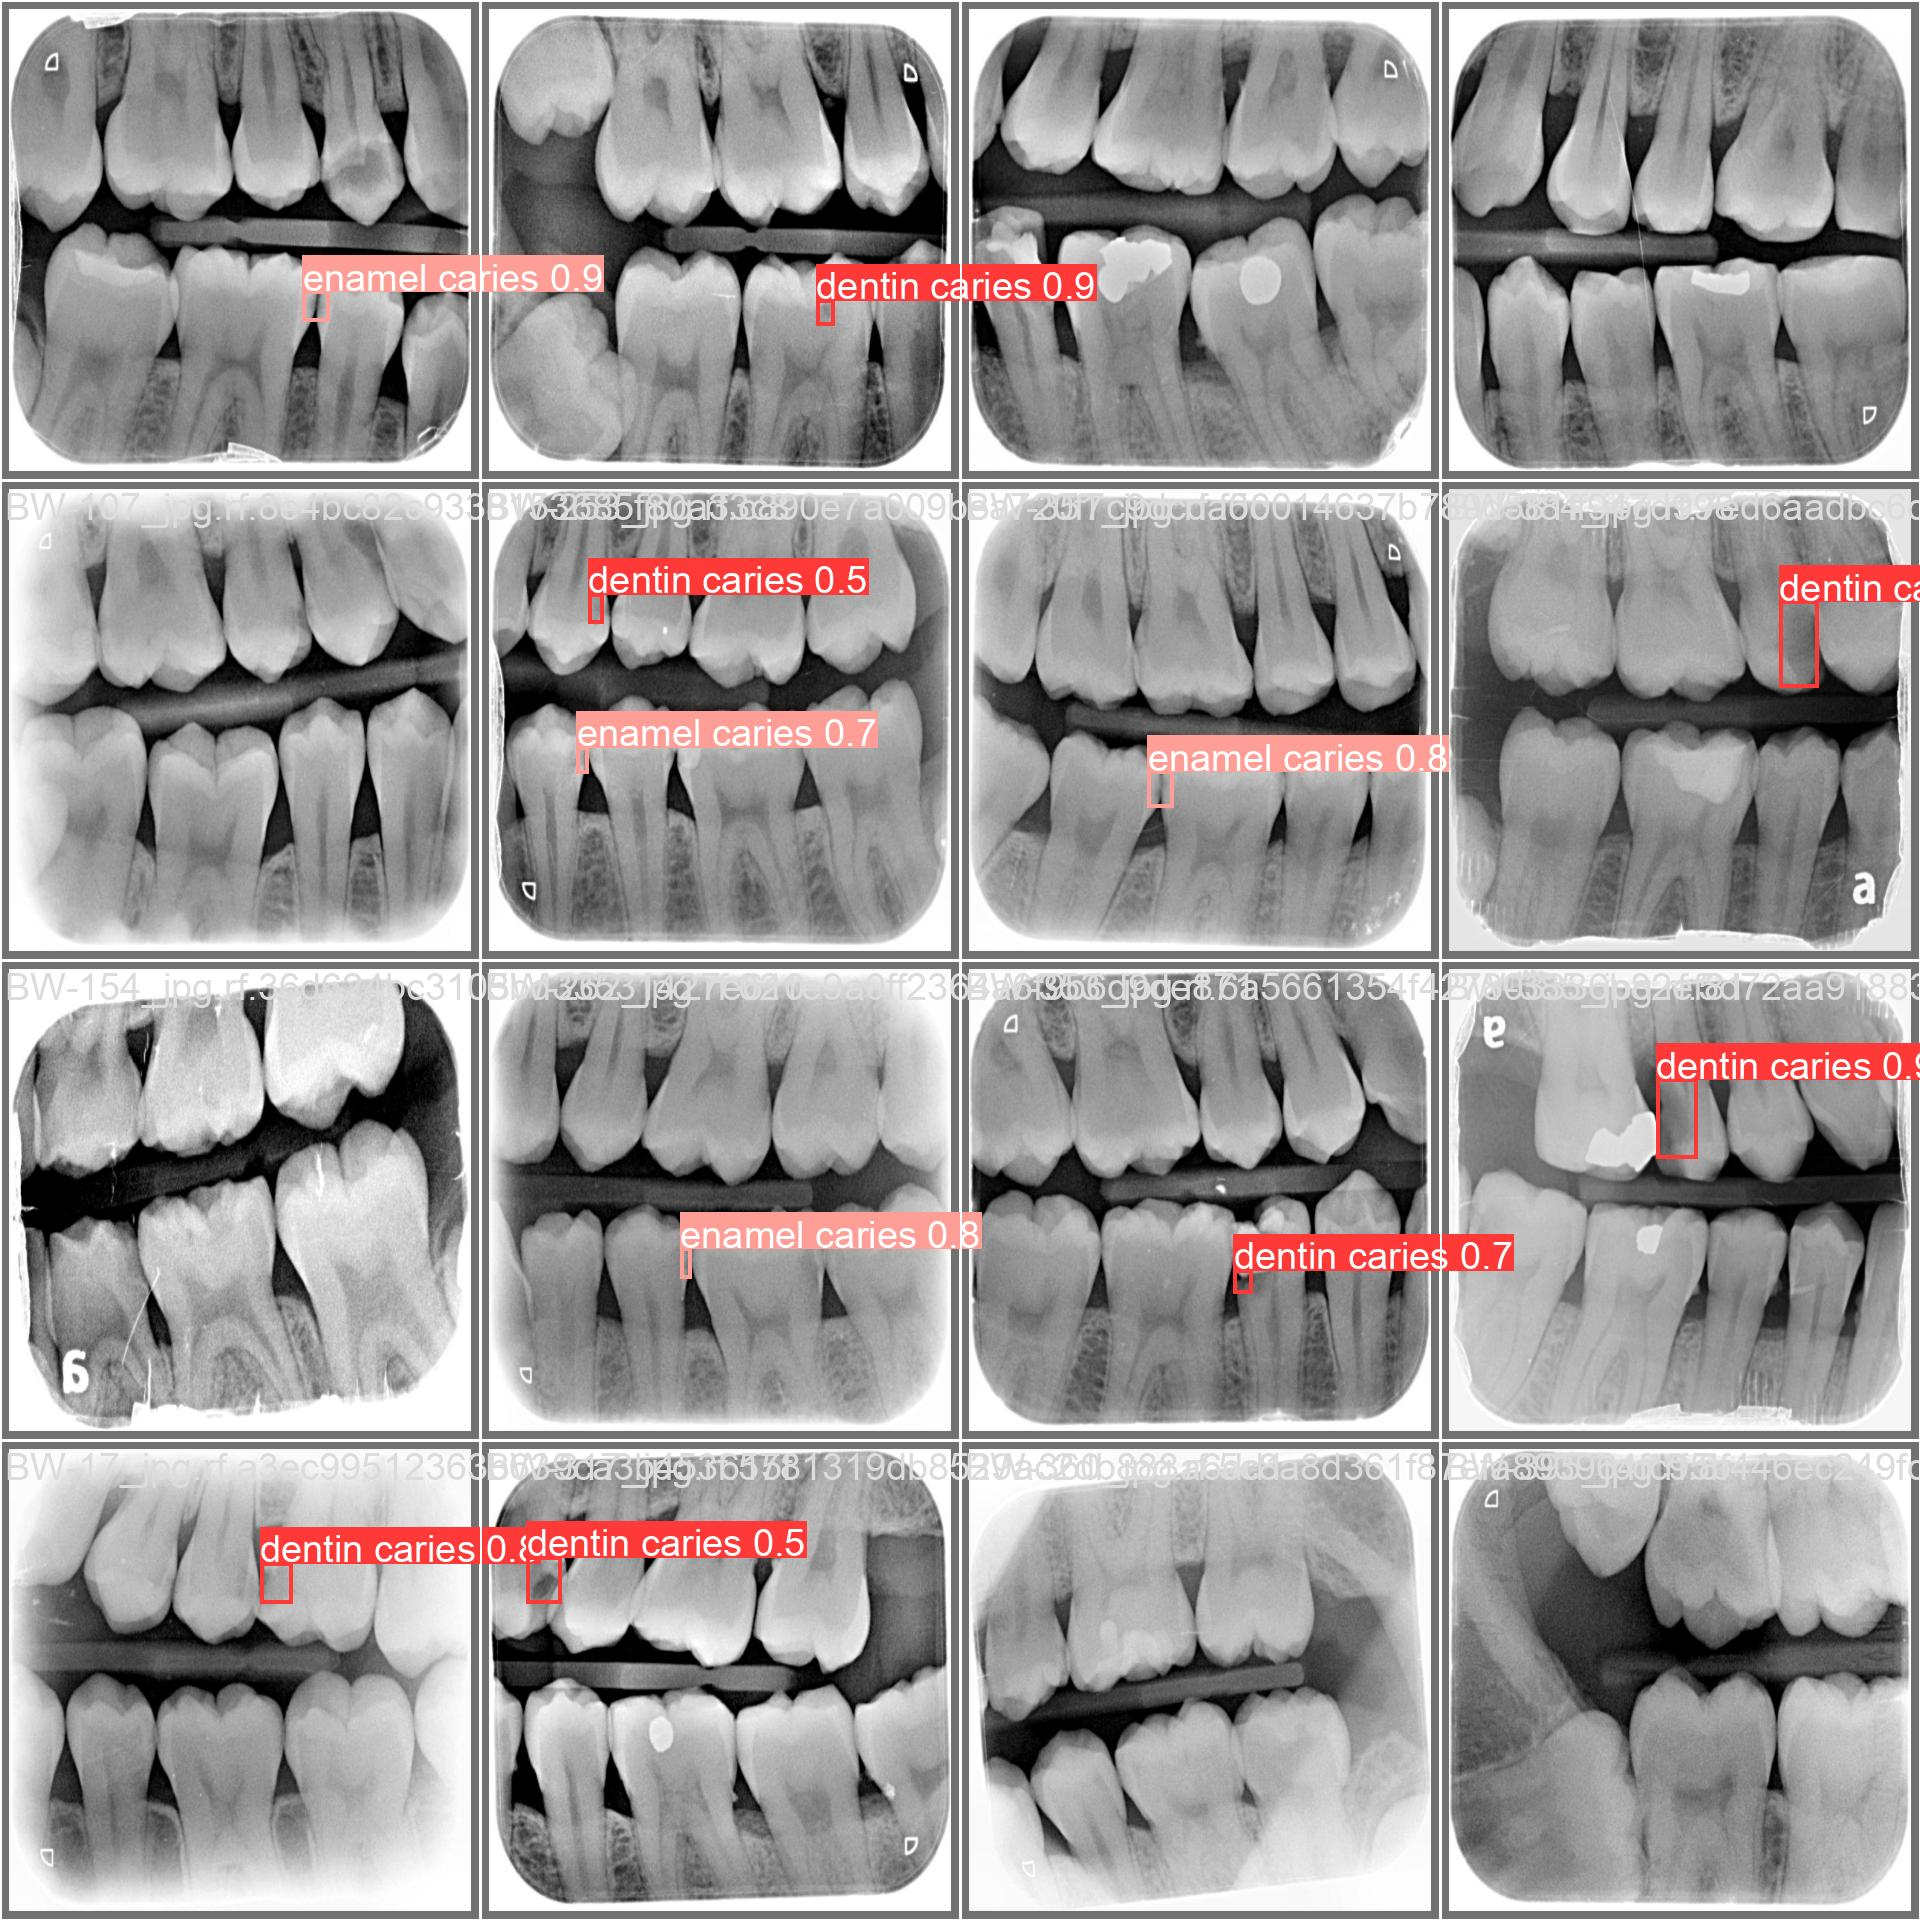

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=/content/detection_model.pt data={dataset.location}/data.yaml

/content
2024-01-16 15:06:35.310748: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Caries-detection-8/test/labels... 16 images, 0 backgrounds, 0 corrupt: 100% 16/16 [00:00<00:00, 1871.67it/s]
val: New cache created: /content/datasets/Caries-detection-8/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:26<00:00, 26.04s/it]
                   all         16         31      0.856      0.456      0.628      0.239
         dentin caries         16         17      0.864      0.412      0.582      0.191
         enamel caries         16         14      0.848        0.5      0.675      0.288
Speed: 16.6ms pre-process, 1595.1ms inference, 0.0ms loss, 0.8ms post-process per image


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/detection_model.pt conf=0.2 source={dataset.location}/test/images save=True save_txt

/content
2024-01-16 15:07:51.629166: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/16 /content/datasets/Caries-detection-8/test/images/BW-148_jpg.rf.2d46095622f53ff62c5c4985018c39b3.jpg: 800x800 1 dentin caries, 1207.7ms
image 2/16 /content/datasets/Caries-detection-8/test/images/BW-161_jpg.rf.0b99afc06ee5d111f95d52d839c2de26.jpg: 800x800 1 enamel caries, 1024.3ms
image 3/16 /content/datasets/Caries-detection-8/test/images/BW-200_jpg.rf.af1f18589bf155c60618b39596f6c0de.jpg: 800x800 1 dentin caries, 966.0ms
image 4/16 /content/datasets/Caries-detection-8/test/images/BW-255_jpg.rf.b0ace6acf96488b5512a5be1f85d7265.jpg: 800x800 2 dentin cariess, 968.2ms
image 5/16 /content/datasets/Caries-detection-8/test/images/BW-306_jpg.rf.1aa00d35d88730cfc96a1a8156805ed6.jpg: 800x800 1 dentin caries, 983

**NOTE:** Let's take a look at few results.

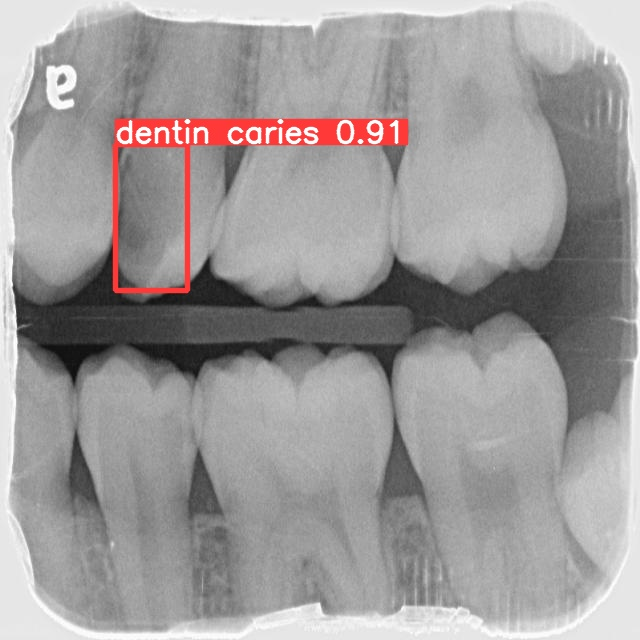

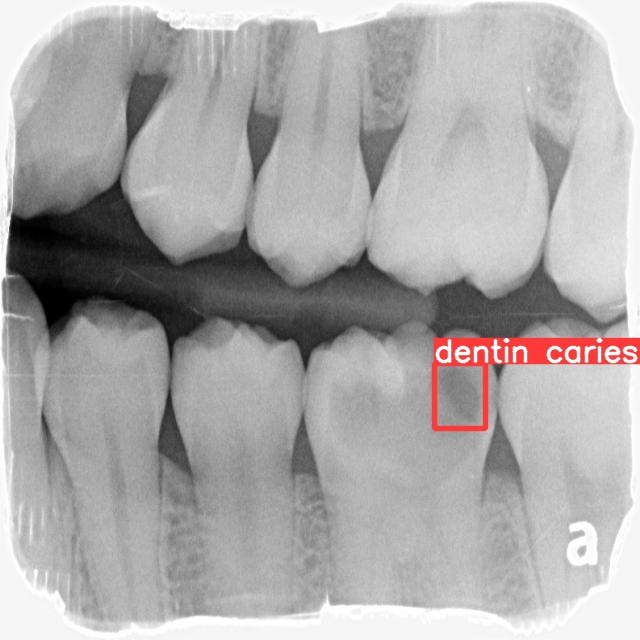

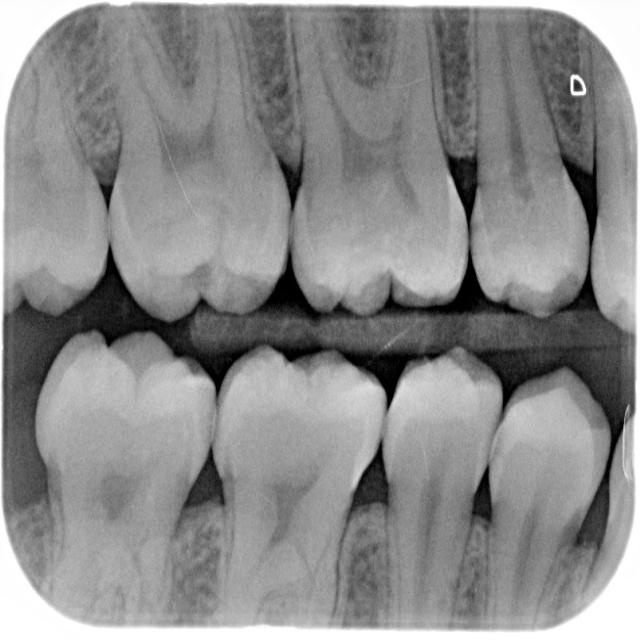

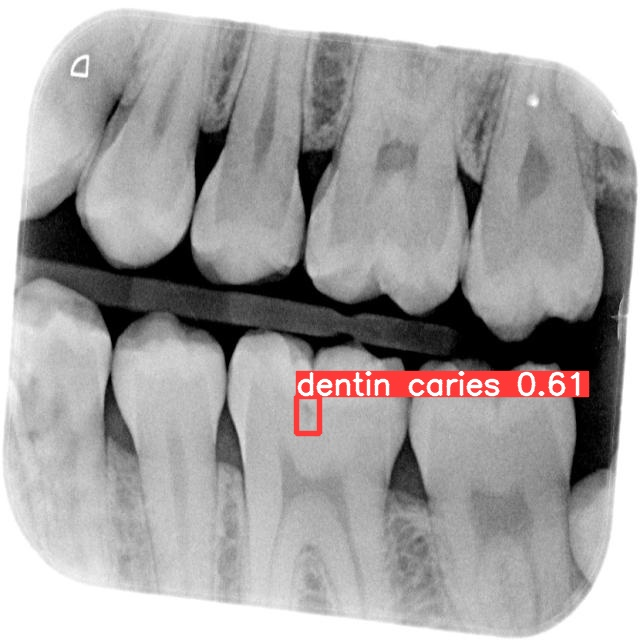

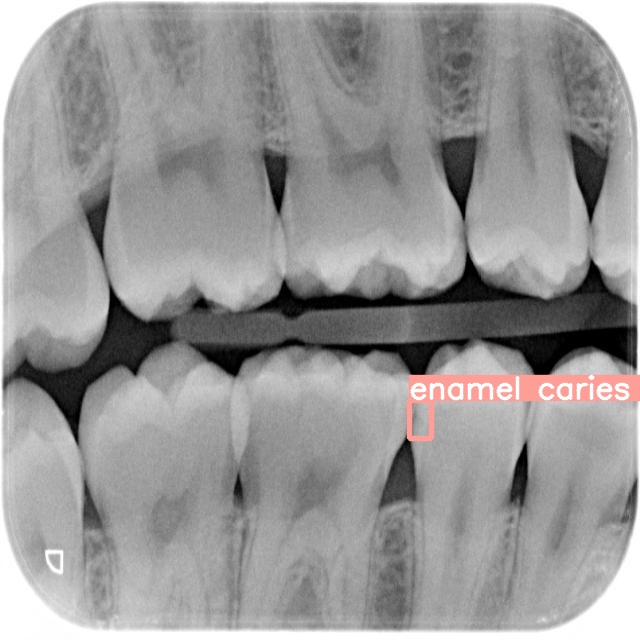

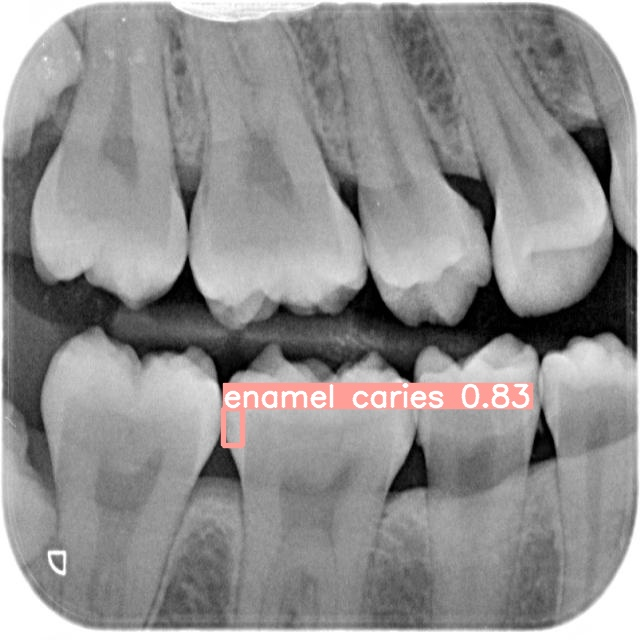

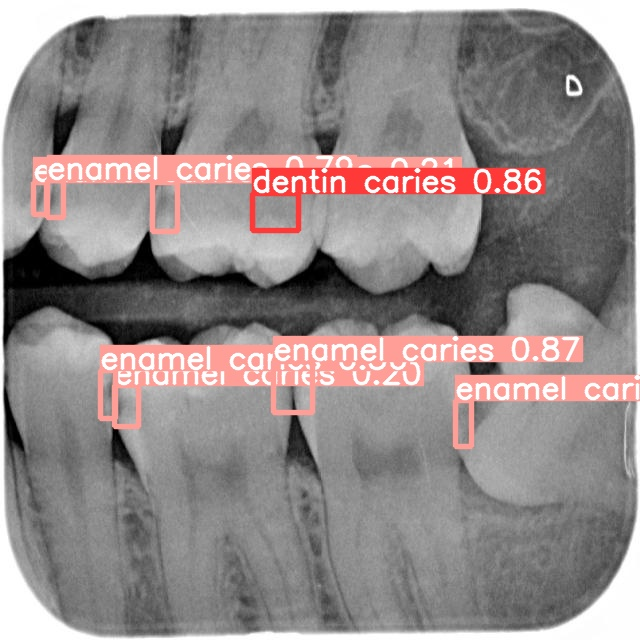

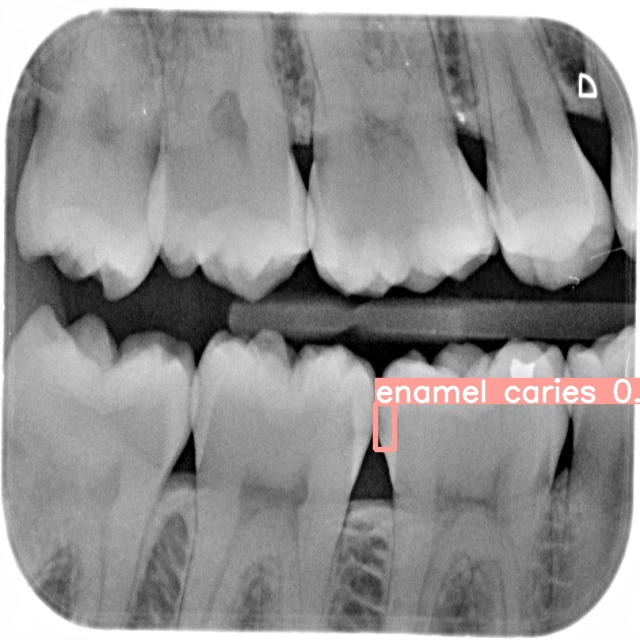

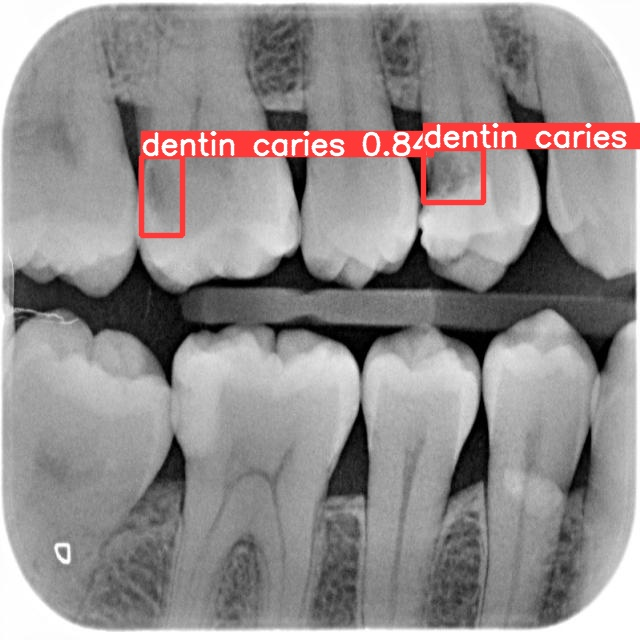

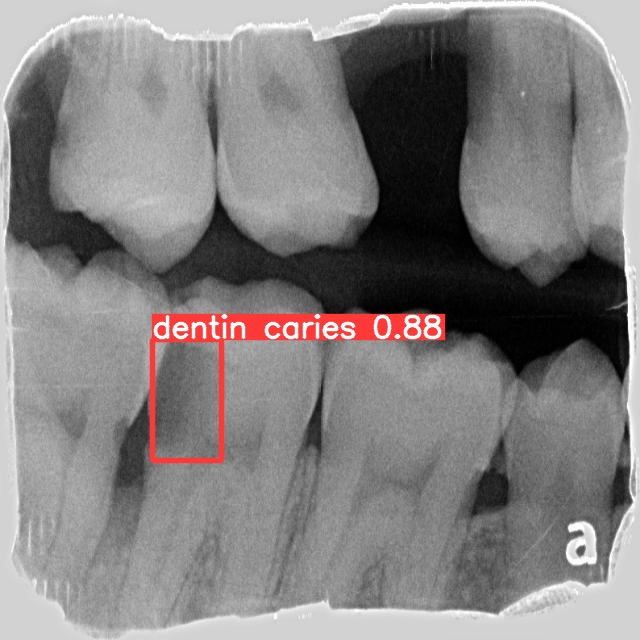

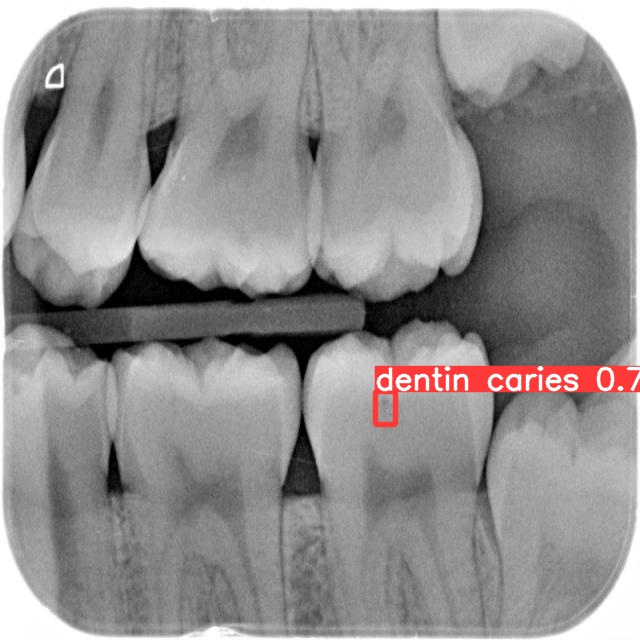

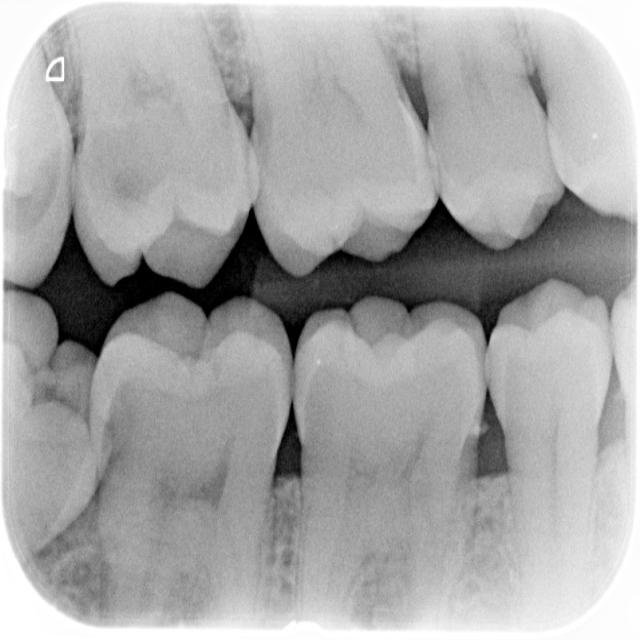

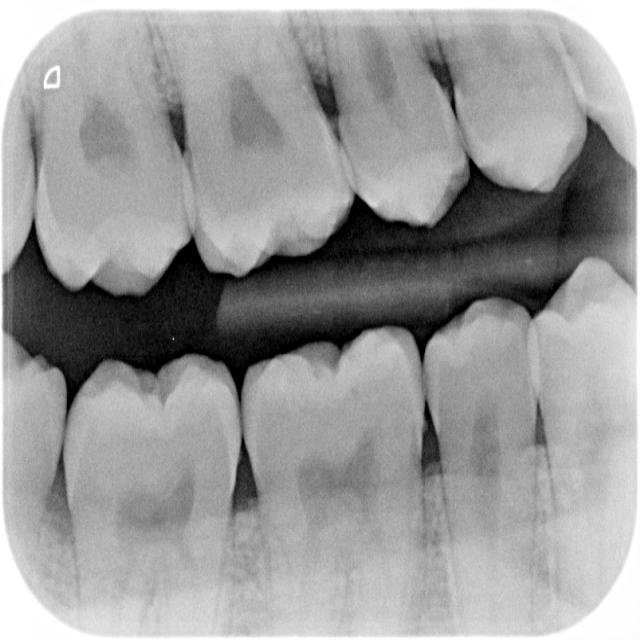

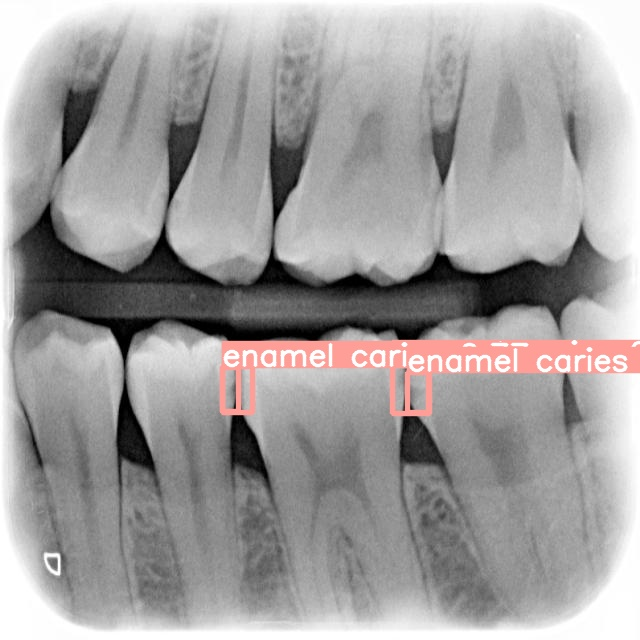

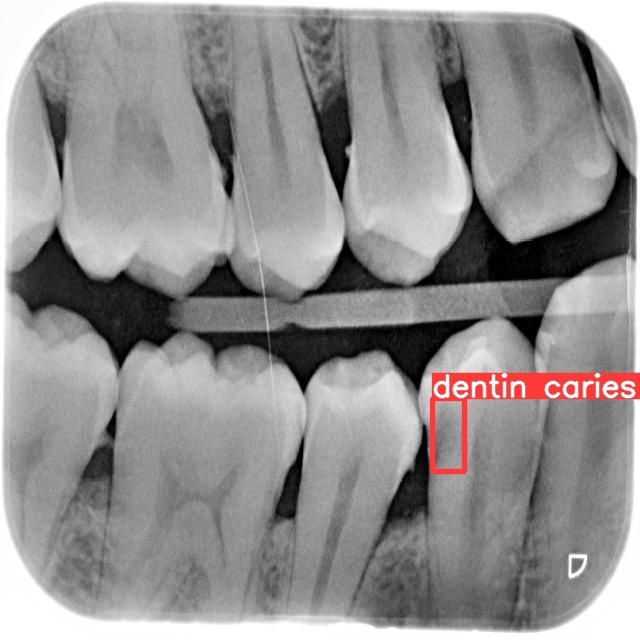

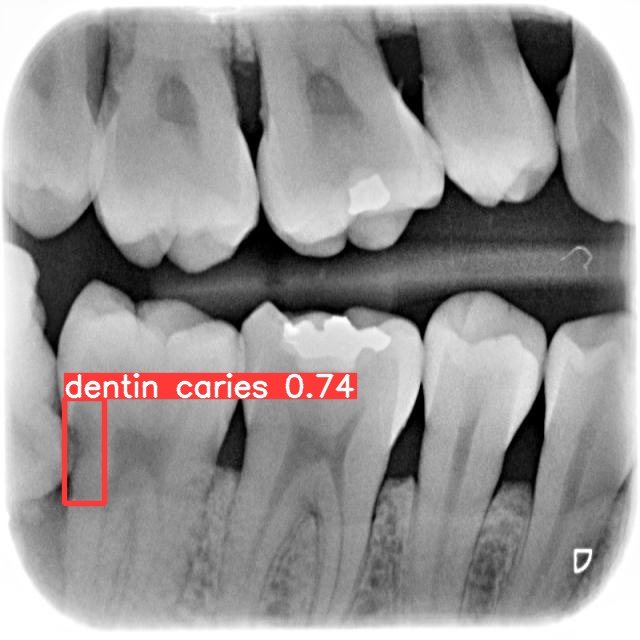

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")